# Init

In [1]:
import pandas as pd
import numpy as np
import json
import gzip

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
FILE_PATH = '.\\data\\ratebeer.json'
# TODO temporarily using smaller dataset so I can analyze results faster
FILE_PATH = '.\\data\\beer_50000.json'
f = open(FILE_PATH)
dataset = []
for l in f:
    #print(l)
    dataset.append(eval(l))

In [3]:
dataset[2]['beer/style']
print(len(dataset))

50000


In [4]:
# DESCRIPTIONS ARE ACCORDING TO CHATGPT (take with a grain of salt)


ales = set() # ALE
ipas = set() # A subset of ales
dark_ales = set() # A subset of ales

lagers = set() # LAGERs are different somehow? idek man

sakes = set() # RICE BEER
misc = set() #Beers I was unable to classify into a category

# I don't know if this is a 'real' category but these are all fruit infused or based beers
fruitbeers = set()

# Not sure how to categorize the 'lambics'
# MEAD IS ITS OWN CATEGORY OF ALCOHOL BUT I PUT IT INTO p_fruit cuz its sweet

for d in dataset:
    # presets based on ChatGPT categorizations
    p_ales = ['Belgian White &#40;Witbier&#41;', 'Berliner Weisse', 'Bire de Garde', 'Saison', 'Schwarzbier', 'Abbey Dubbel', 'Abbey Tripel', 'Abt/Quadrupel', 'Altbier', 'Barley Wine', 'German Hefeweizen', 'German Kristallweizen', 'Weizen Bock']
    p_paleales = ['Premium Bitter/ESB', 'Bitter',]
    p_lagers = ['Dunkelweizen', 'Kölsch', 'Klsch', 'Eisbock', 'Malt Liquor', 'California Common', 'Doppelbock', 'Dunkel', 'Dunkler Bock', 'Dortmunder/Helles', 'Heller Bock', 'Oktoberfest/Mrzen', 'Vienna', 'Zwickel/Keller/Landbier']
    p_fruit = ['Cider', 'Fruit Beer', 'Ice Cider/Perry', 'Perry', 'Mead']

    if not d:
        continue
    s = d['beer/style']
    if 'Pale Ale' in s or 'IPA' in s or s in p_paleales:
        ipas.add(s)
    elif 'Ale' in s or s in p_ales:
        ales.add(s)
    elif 'Stout' in s or 'Porter' in s:
        dark_ales.add(s)
    elif 'Lager' in s or 'Pilsener' in s or s in p_lagers:
        lagers.add(s)
    elif 'Sak' in s:
        sakes.add(s)
    elif s in p_fruit:
        fruitbeers.add(s)
    else:
        misc.add(s)

# print the size of each set
print('Ales:', len(ales))
print('Dark Ales:', len(dark_ales))
print('IPAs:', len(ipas))
print('Sakes:', len(sakes))
print('Fruit Beers:', len(fruitbeers))

print(misc)

# TODO
'''
It is definitely worth looking into splitting up the 'ale' dataset into more specific categories.
I haven't looked into the dataset enough but I assume the vast majority of beers fall under this category,
unless we break it up or perform some model balancing I would expect it to be heavily biased towards this category.

The same could possibly be said fo for the lagers category, but I'm not sure.

If you are still stuck with an extremely low accuracy even with this tweak, I think it'd be a good idea that
we look into other features. I still believe that identifying certain keywords in the text part of the review
would work extremely well for this case.
'''
''

Ales: 25
Dark Ales: 11
IPAs: 8
Sakes: 0
Fruit Beers: 0
{'Herbed / Spiced Beer', 'Bock', 'Keller Bier / Zwickel Bier', 'Hefeweizen', 'Maibock / Helles Bock', 'Black & Tan', 'American Barleywine', 'American Double / Imperial Pilsner', 'Chile Beer', 'Extra Special / Strong Bitter (ESB)', 'American Malt Liquor', 'Fruit / Vegetable Beer', 'BiÃ¨re de Garde', 'Rauchbier', 'MÃ¤rzen / Oktoberfest', 'English Bitter', 'Smoked Beer', 'Kristalweizen', 'Lambic - Unblended', 'Dubbel', 'Tripel', 'Low Alcohol Beer', 'English Barleywine', 'KÃ¶lsch', 'California Common / Steam Beer', 'Berliner Weissbier', 'Weizenbock', 'Lambic - Fruit', 'Braggot', 'Quadrupel (Quad)', 'Winter Warmer', 'Wheatwine', 'Witbier', 'Rye Beer', 'Flanders Oud Bruin'}


''

In [5]:
from collections import defaultdict
#TODO this isn't parsing right when using ratebeer.json
# It throws a KeyError for styles that are not
'''
('India Pale Ale &#40;IPA&#41;', 185953)
('Pale Lager', 145618)
('Belgian Strong Ale', 123946)
('Imperial Stout', 122223)
('Imperial/Double IPA', 105672)
'''
k = 'beer/style'
styles = {}
styles = defaultdict(int)
count = 0
for d in dataset:
  #print(d[k])
  styles[d[k]] += 1
  count += 1
    # try:
    #     s = d[k]
    # except KeyError:
    #     count += 1
    #     print("Key error")
    #     continue
    # if s in styles:
    #     styles[s] +=1
    # else:
    #     styles[s] = 1

print(count)
print(styles)
print(len(styles))
#sort styles
sorted_styles = sorted(styles.items(), key=lambda x: x[1], reverse=True)
for k in sorted_styles[:5]:
    print(k)

#TODO For proper classification we should probably group these together in some way?
# I don't know how we would go about this, if it is as straightforward as 'all IPAs go into one group'

50000
defaultdict(<class 'int'>, {'Hefeweizen': 618, 'English Strong Ale': 164, 'Foreign / Export Stout': 55, 'German Pilsener': 586, 'American Double / Imperial IPA': 3886, 'Herbed / Spiced Beer': 73, 'Oatmeal Stout': 102, 'American Pale Lager': 123, 'Rauchbier': 1938, 'American Pale Ale (APA)': 2288, 'American Porter': 2230, 'Belgian Strong Dark Ale': 146, 'Russian Imperial Stout': 2695, 'American Amber / Red Ale': 665, 'American Strong Ale': 166, 'MÃ¤rzen / Oktoberfest': 557, 'American Adjunct Lager': 242, 'American Blonde Ale': 357, 'American IPA': 4113, 'Fruit / Vegetable Beer': 1355, 'English Bitter': 267, 'English Porter': 367, 'Irish Dry Stout': 101, 'American Barleywine': 825, 'American Double / Imperial Stout': 5964, 'Doppelbock': 873, 'American Stout': 591, 'Maibock / Helles Bock': 225, 'Dortmunder / Export Lager': 31, 'Euro Strong Lager': 329, 'Low Alcohol Beer': 7, 'Light Lager': 503, 'Euro Pale Lager': 701, 'Bock': 148, 'English India Pale Ale (IPA)': 175, 'Altbier': 165,

In [6]:
X, y = [], []

unique_styles = list(set(d['beer/style'] for d in dataset))
le = LabelEncoder()
le.fit(unique_styles)

for d in dataset:
    f1 = d['review/appearance']
    f2 = d['review/palate']
    f3 = d['review/taste']
    f4 = d['review/aroma']
    X.append([f1, f2, f3, f4])

    t = d['beer/style']

    #y.append(t)
    y.append(le.transform([t])[0])

# y_set = set(y)
# print(y_set)

In [7]:
# le = LabelEncoder()
# y = le.fit_transform(y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [9]:
#Note adding class_weight balanced makes it perform worse.
model = LogisticRegression(max_iter = 2000, class_weight="balanced")
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=2000)

In [10]:
preds = model.predict(X_test)

In [11]:
print(preds)
print(len(preds))

[80 28 11 ... 11 79 81]
5000


In [12]:
y_index = 0
correct = 0
totalCount = 0
#valid_preds = le.inverse_transform(preds)
#print(valid_preds)
correct_info = defaultdict(int)
correct_list = []
for pred in preds:
  # style = le.inverse_transform(pred)
  # print(y_test[y_index])
  if y_test[y_index] == pred:
    correct += 1
    correct_list.append(pred)
  totalCount += 1
  y_index += 1


In [13]:
print(correct)

385


In [14]:
print(totalCount)

5000


In [15]:
acc = correct/totalCount
print(f"acc: {acc}")

acc: 0.077


In [16]:
le.inverse_transform(correct_list)
# Note: Model seems to be guessing always Imperial Spout since that's whats most popular in the list

array(['American Double / Imperial Stout', 'Russian Imperial Stout',
       'Russian Imperial Stout', 'Pumpkin Ale', 'Russian Imperial Stout',
       'American Double / Imperial Stout', 'Rye Beer',
       'American Double / Imperial Stout',
       'American Double / Imperial Stout', 'Russian Imperial Stout',
       'Russian Imperial Stout', 'American Double / Imperial Stout',
       'Russian Imperial Stout', 'American Double / Imperial Stout',
       'American Double / Imperial Stout', 'Russian Imperial Stout',
       'Russian Imperial Stout', 'American Double / Imperial Stout',
       'American Double / Imperial Stout',
       'American Double / Imperial Stout',
       'American Double / Imperial Stout',
       'American Double / Imperial Stout',
       'American Double / Imperial Stout',
       'American Double / Imperial Stout', 'Rauchbier',
       'Russian Imperial Stout', 'American Double / Imperial Stout',
       'American Double / Imperial Stout', 'Russian Imperial Stout',
     

In [17]:
# Note: Some of the models were initiated with help of chatgpt so trying out other parameters could be good.
# Classifications below by chatgpt. Have checked some just to make sure but more extensive check could be good.
beer_classification = {
    'Hefeweizen': 'Ale',
    'English Strong Ale': 'Ale',
    'Foreign / Export Stout': 'Ale',
    'German Pilsener': 'Lager',
    'American Double / Imperial IPA': 'Ale',
    'Herbed / Spiced Beer': 'Other',
    'Oatmeal Stout': 'Ale',
    'American Pale Lager': 'Lager',
    'Rauchbier': 'Lager',
    'American Pale Ale (APA)': 'Ale',
    'American Porter': 'Ale',
    'Belgian Strong Dark Ale': 'Ale',
    'Russian Imperial Stout': 'Ale',
    'American Amber / Red Ale': 'Ale',
    'American Strong Ale': 'Ale',
    'Märzen / Oktoberfest': 'Lager',
    'American Adjunct Lager': 'Lager',
    'American Blonde Ale': 'Ale',
    'American IPA': 'Ale',
    'Fruit / Vegetable Beer': 'Other',
    'English Bitter': 'Ale',
    'English Porter': 'Ale',
    'Irish Dry Stout': 'Ale',
    'American Barleywine': 'Ale',
    'American Double / Imperial Stout': 'Ale',
    'Doppelbock': 'Lager',
    'American Stout': 'Ale',
    'Maibock / Helles Bock': 'Lager',
    'Dortmunder / Export Lager': 'Lager',
    'Euro Strong Lager': 'Lager',
    'Low Alcohol Beer': 'Other',
    'Light Lager': 'Lager',
    'Euro Pale Lager': 'Lager',
    'Bock': 'Lager',
    'English India Pale Ale (IPA)': 'Ale',
    'Altbier': 'Ale',
    'Kölsch': 'Ale',
    'Pumpkin Ale': 'Ale',
    'Rye Beer': 'Ale',
    'American Pale Wheat Ale': 'Ale',
    'Milk / Sweet Stout': 'Ale',
    'Schwarzbier': 'Lager',
    'Munich Dunkel Lager': 'Lager',
    'Vienna Lager': 'Lager',
    'American Amber / Red Lager': 'Lager',
    'Scottish Ale': 'Ale',
    'Witbier': 'Ale',
    'Saison / Farmhouse Ale': 'Ale',
    'American Black Ale': 'Ale',
    'English Brown Ale': 'Ale',
    'English Barleywine': 'Ale',
    'Extra Special / Strong Bitter (ESB)': 'Ale',
    'California Common / Steam Beer': 'Lager',
    'Euro Dark Lager': 'Lager',
    'Scotch Ale / Wee Heavy': 'Ale',
    'English Pale Ale': 'Ale',
    'Belgian Strong Pale Ale': 'Ale',
    'Belgian Pale Ale': 'Ale',
    'Tripel': 'Ale',
    'Flanders Oud Bruin': 'Ale',
    'American Brown Ale': 'Ale',
    'Smoked Beer': 'Other',
    'Dunkelweizen': 'Ale',
    'Dubbel': 'Ale',
    'Keller Bier / Zwickel Bier': 'Lager',
    'Winter Warmer': 'Ale',
    'Bière de Garde': 'Ale',
    'Belgian Dark Ale': 'Ale',
    'Irish Red Ale': 'Ale',
    'Chile Beer': 'Other',
    'English Stout': 'Ale',
    'Czech Pilsener': 'Lager',
    'Belgian IPA': 'Ale',
    'Black & Tan': 'Other',
    'Cream Ale': 'Ale',
    'English Dark Mild Ale': 'Ale',
    'American Wild Ale': 'Ale',
    'Weizenbock': 'Ale',
    'American Double / Imperial Pilsner': 'Lager',
    'Scottish Gruit / Ancient Herbed Ale': 'Other',
    'Wheatwine': 'Ale',
    'American Dark Wheat Ale': 'Ale',
    'American Malt Liquor': 'Other',
    'Munich Helles Lager': 'Lager',
    'Kristalweizen': 'Ale',
    'English Pale Mild Ale': 'Ale',
    'Baltic Porter': 'Lager',
    'Old Ale': 'Ale',
    'Quadrupel (Quad)': 'Ale',
    'Braggot': 'Other',
    'Lambic - Fruit': 'Other',
    'Lambic - Unblended': 'Other',
    'Eisbock': 'Lager',
    'Flanders Red Ale': 'Ale',
    'Berliner Weissbier': 'Ale',
    'MÃ¤rzen / Oktoberfest': 'Lager',
    'BiÃ¨re de Garde': 'Ale',
    'KÃ¶lsch': 'Ale'

}


In [18]:
import copy
mod_X, mod_y = [], []

mod_dataset = []
for d in dataset:
    mod_d = copy.deepcopy(d)
    style = mod_d["beer/style"]
    try:
      mod_style = beer_classification[style]
      mod_d["beer/style"] = mod_style
      mod_dataset.append(mod_d)

    except:
      print(style)
      continue

unique_styles = list(set(d['beer/style'] for d in mod_dataset))
mod_le = LabelEncoder()
mod_le.fit(unique_styles)

for d in mod_dataset:
    f1 = d['review/appearance']
    f2 = d['review/palate']
    f3 = d['review/taste']
    f4 = d['review/aroma']
    mod_X.append([f1, f2, f3, f4])

    t = d['beer/style']

    #y.append(t)
    mod_y.append(mod_le.transform([t])[0])


In [19]:
print(len(mod_dataset))

50000


In [20]:
datasetCheck = defaultdict(int)
for d in mod_dataset:
  datasetCheck[d["beer/style"]] += 1
print(datasetCheck)

defaultdict(<class 'int'>, {'Ale': 38784, 'Lager': 9390, 'Other': 1826})


In [21]:
mX_train, mX_test, my_train, my_test = train_test_split(mod_X, mod_y, test_size=0.1)
three_model = LogisticRegression(max_iter = 2000, class_weight = "balanced", C=0.000001)
three_model.fit(mX_train, my_train)

LogisticRegression(C=1e-06, class_weight='balanced', max_iter=2000)

In [22]:
preds = three_model.predict(mX_test)
print(preds)

[0 0 0 ... 0 0 2]


In [23]:
countDict = defaultdict(int)
for pred in preds:
  countDict[pred] += 1
print(countDict)

defaultdict(<class 'int'>, {np.int64(0): 3520, np.int64(2): 1342, np.int64(1): 138})


In [24]:
y_index = 0
correct = 0
totalCount = 0
#valid_preds = le.inverse_transform(preds)
#print(valid_preds)
correct_info = defaultdict(int)
correct_list = []
for pred in preds:
  # style = le.inverse_transform(pred)
  # print(y_test[y_index])
  if my_test[y_index] == pred:
    correct += 1
    correct_list.append(pred)
  totalCount += 1
  y_index += 1

In [25]:
print(correct)
print(totalCount)
print(classification_report(my_test, preds, target_names=['Ale', 'Lager', 'Other']))

3059
5000
              precision    recall  f1-score   support

         Ale       0.84      0.75      0.79      3924
       Lager       0.28      0.04      0.07       905
       Other       0.06      0.46      0.10       171

    accuracy                           0.61      5000
   macro avg       0.39      0.42      0.32      5000
weighted avg       0.71      0.61      0.64      5000



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b43dcfee-6463-49e3-810e-ef99150e174c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [26]:
yTestDict = defaultdict(int)
for beer_type in my_test:
  yTestDict[beer_type] += 1
print(yTestDict)

defaultdict(<class 'int'>, {np.int64(0): 3924, np.int64(1): 905, np.int64(2): 171})


In [27]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 10)
rfc_model.fit(mX_train, my_train)
rfc_preds = rfc_model.predict(mX_test)


In [28]:
y_index = 0
correct = 0
totalCount = 0
#valid_preds = le.inverse_transform(preds)
#print(valid_preds)
correct_info = defaultdict(int)
correct_list = []
for pred in rfc_preds:
  # style = le.inverse_transform(pred)
  # print(y_test[y_index])
  if my_test[y_index] == pred:
    correct += 1
    correct_list.append(pred)
  totalCount += 1
  y_index += 1

In [29]:
print(correct)
print(f"acc: {correct/totalCount}")
print(classification_report(my_test, rfc_preds, target_names=['Ale', 'Lager', 'Other']))

3934
acc: 0.7868
              precision    recall  f1-score   support

         Ale       0.80      0.98      0.88      3924
       Lager       0.50      0.09      0.15       905
       Other       0.00      0.00      0.00       171

    accuracy                           0.79      5000
   macro avg       0.43      0.36      0.34      5000
weighted avg       0.72      0.79      0.72      5000



In [30]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB

# Initialize and train the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(mX_train, my_train)

# Make predictions
nb_preds = nb_model.predict(mX_test)

# Evaluate performance
print(classification_report(my_test, nb_preds, target_names=['Ale', 'Lager', 'Other']))


              precision    recall  f1-score   support

         Ale       0.81      0.89      0.85      3924
       Lager       0.33      0.26      0.29       905
       Other       0.00      0.00      0.00       171

    accuracy                           0.75      5000
   macro avg       0.38      0.38      0.38      5000
weighted avg       0.70      0.75      0.72      5000



c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [31]:
# Commented out since this model is worse and takes a while to run
# from sklearn.svm import SVC

# SVC_model = SVC(kernel='rbf', probability=True, random_state=42)
# SVC_model.fit(mX_train, my_train)
# svc_preds = SVC_model.predict(mX_test)

In [32]:
# print(classification_report(my_test, svc_preds, target_names=['Ale', 'Lager', 'Other']))

In [33]:
from xgboost import XGBClassifier

XGB_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
XGB_model.fit(mX_train, my_train)
xgb_preds = XGB_model.predict(mX_test)

c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [14:43:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [34]:
print(classification_report(my_test, xgb_preds, target_names=['Ale', 'Lager', 'Other']))

              precision    recall  f1-score   support

         Ale       0.80      0.98      0.88      3924
       Lager       0.48      0.09      0.15       905
       Other       0.25      0.01      0.01       171

    accuracy                           0.79      5000
   macro avg       0.51      0.36      0.35      5000
weighted avg       0.72      0.79      0.72      5000



In [35]:
beer_list = []
for d in dataset:
 beer_list.append(d['beer/style'])
beer_list = list(set(beer_list))

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(mX_train, my_train)
gbc_preds = gbc.predict(mX_test)

In [37]:
print(classification_report(my_test, xgb_preds, target_names=['Ale', 'Lager', 'Other']))

              precision    recall  f1-score   support

         Ale       0.80      0.98      0.88      3924
       Lager       0.48      0.09      0.15       905
       Other       0.25      0.01      0.01       171

    accuracy                           0.79      5000
   macro avg       0.51      0.36      0.35      5000
weighted avg       0.72      0.79      0.72      5000



In [38]:
# X, y = [], []

# unique_styles = list(set(d['beer/style'] for d in dataset))
# le = LabelEncoder()
# le.fit(unique_styles)

# for d in dataset:
#     f1 = d['review/appearance']
#     f2 = d['review/palate']
#     f3 = d['review/taste']
#     f4 = d['review/aroma']
#     X.append([f1, f2, f3, f4])

#     t = d['beer/style']

#     #y.append(t)
#     y.append(le.transform([t])[0])

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)


In [39]:
# Baseline Model: Model will just always predict Ale since it is ~78 percent of the dataset

ale_list = [0,1,2]
print(mod_le.inverse_transform(ale_list))
# Note: 0 corresponds with Ale so just always predict 0

y_index = 0
correct = 0
totalCount = 0
baseline_preds = []
for beer_type in my_test:
  prediction = 0
  baseline_preds.append(prediction)
  if prediction == beer_type:
    correct += 1
  totalCount += 1

print(classification_report(my_test, baseline_preds, target_names=['Ale', 'Lager', 'Other']))

['Ale' 'Lager' 'Other']
              precision    recall  f1-score   support

         Ale       0.78      1.00      0.88      3924
       Lager       0.00      0.00      0.00       905
       Other       0.00      0.00      0.00       171

    accuracy                           0.78      5000
   macro avg       0.26      0.33      0.29      5000
weighted avg       0.62      0.78      0.69      5000



c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [45]:
import random

# Combine X and y to ensure consistent shuffling
data = list(zip(mod_X, mod_y))

# Shuffle the data
random.seed(42)  # For reproducibility
random.shuffle(data)

# Unzip the shuffled data
mod_X, mod_y = zip(*data)

# Calculate split indices
n_total = len(mod_X)
train_end = int(0.85 * n_total)
val_end = int(0.95 * n_total)

# Perform the splits
mX_train, my_train = mod_X[:train_end], mod_y[:train_end]  # 85% training
mX_val, my_val = mod_X[train_end:val_end], mod_y[train_end:val_end]  # 10% validation
mX_test, my_test = mod_X[val_end:], mod_y[val_end:]  # 5% test

# Check the sizes of the splits
print(f"Training set size: {len(mX_train)} ({len(mX_train) / n_total * 100:.2f}%)")
print(f"Validation set size: {len(mX_val)} ({len(mX_val) / n_total * 100:.2f}%)")
print(f"Test set size: {len(mX_test)} ({len(mX_test) / n_total * 100:.2f}%)")


Training set size: 42500 (85.00%)
Validation set size: 5000 (10.00%)
Test set size: 2500 (5.00%)


In [54]:
# Going with Random Forest Classifier
rfc_model = RandomForestClassifier(n_estimators=50, max_depth = 5, min_samples_split=2, min_samples_leaf=4, random_state=42, criterion = "log_loss")
rfc_model.fit(mX_train, my_train)
rfc_preds = rfc_model.predict(mX_test)

In [55]:
# get the parameters of the model
print(rfc_model.get_params())
# print the model classifier
print(rfc_model)


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 50, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
RandomForestClassifier(criterion='log_loss', max_depth=5, min_samples_leaf=4,
                       n_estimators=50, random_state=42)


In [56]:
y_index = 0
correct = 0
totalCount = 0
#valid_preds = le.inverse_transform(preds)
#print(valid_preds)
correct_info = defaultdict(int)
correct_list = []
for pred in rfc_preds:
  # style = le.inverse_transform(pred)
  # print(y_test[y_index])
  if my_test[y_index] == pred:
    correct += 1
    correct_list.append(pred)
  totalCount += 1
  y_index += 1

print(correct)
print(f"acc: {correct/totalCount}")
print(classification_report(my_test, rfc_preds, target_names=['Ale', 'Lager', 'Other']))

3923
acc: 0.7846
              precision    recall  f1-score   support

         Ale       0.79      0.99      0.88      3864
       Lager       0.66      0.10      0.17       955
       Other       0.00      0.00      0.00       181

    accuracy                           0.78      5000
   macro avg       0.48      0.36      0.35      5000
weighted avg       0.73      0.78      0.71      5000



c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [60]:
len(rfc_model.estimators_)

50

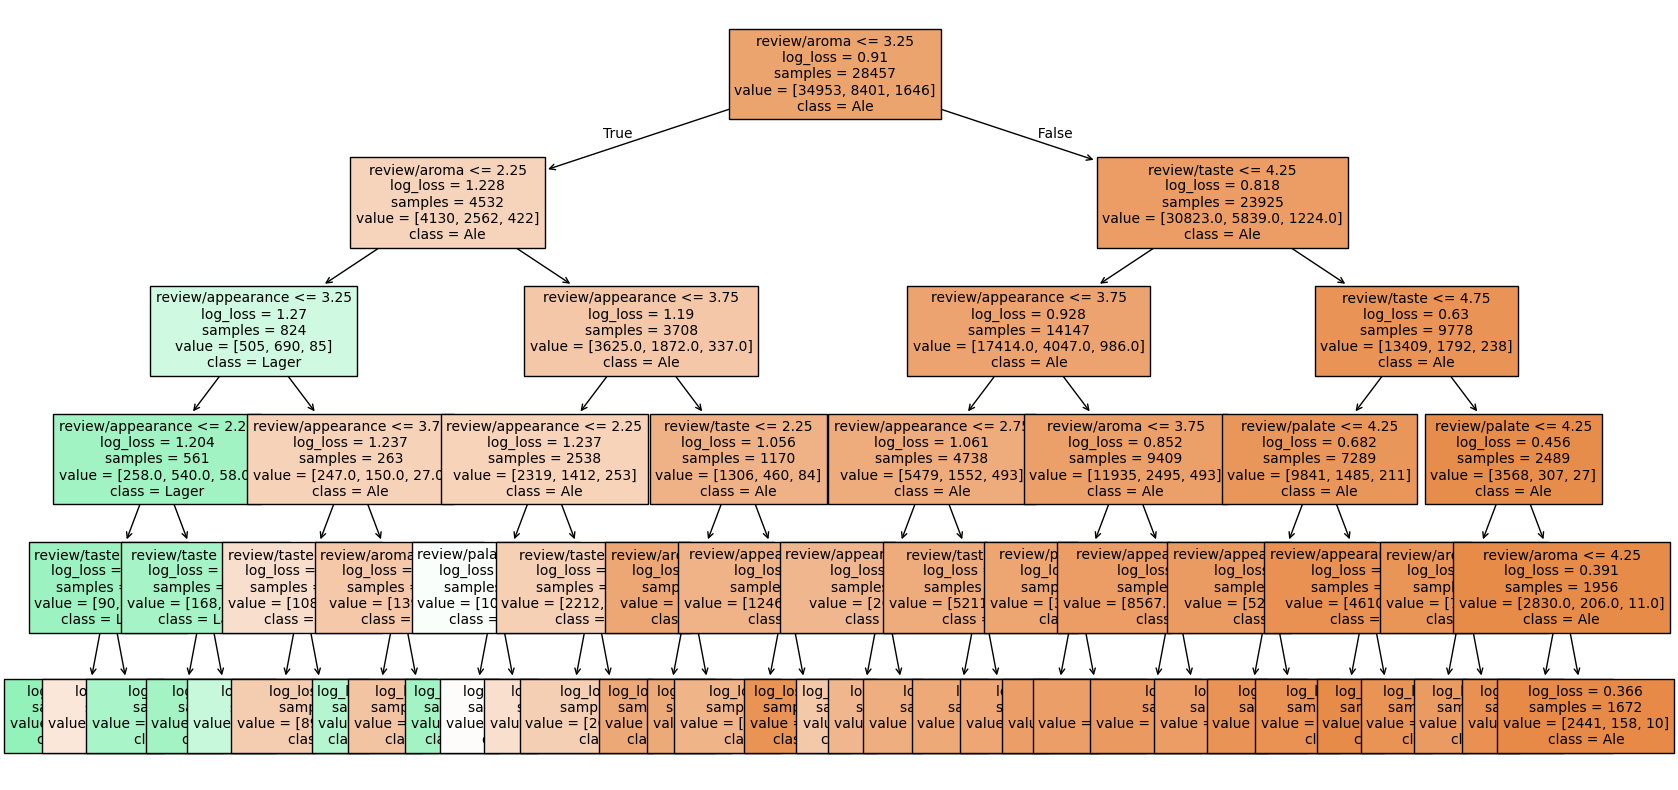

In [59]:
# Get model visualization
from sklearn.tree import plot_tree

import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

# Plot the first decision tree

plot_tree(rfc_model.estimators_[0], feature_names=['review/appearance', 'review/palate', 'review/taste', 'review/aroma'], class_names=['Ale', 'Lager', 'Other'], filled=True, fontsize=10)
plt.show()


In [49]:
# Usewd chatgpt to create a grid search that optimizes for different parameters.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import itertools

# Define your parameter grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 5, 10, 20],     # Maximum depth of trees
    'min_samples_split': [2, 5, 10], # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples per leaf
    'criterion': ['log_loss'], # Criterion for splitting
    'class_weight': [None]
}

# Generate all combinations of parameters
param_combinations = list(itertools.product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['min_samples_split'],
    param_grid['min_samples_leaf'],
    param_grid['criterion'],
    param_grid['class_weight']
))

# Dataset split
mX_train, mX_test, my_train, my_test = train_test_split(mod_X, mod_y, test_size=0.1, random_state=42)

# Function to evaluate a single parameter combination
def evaluate_params(params, X_train, y_train, X_test, y_test):
    n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion, class_weight = params

    # Train the Random Forest with the current parameter combination
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        criterion=criterion,
        class_weight=class_weight,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Evaluate on the test set
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)

    print(f"Parameters: {params}, Accuracy: {accuracy:.4f}")
    return params, accuracy

# Perform parameter tuning
results = [
    evaluate_params(params, mX_train, my_train, mX_test, my_test)
    for params in param_combinations
]

# Find the best parameter combination and its accuracy
best_params, best_accuracy = max(results, key=lambda x: x[1])

# Display the best parameters and accuracy
print(f"Best Parameters: {best_params}")
print(f"Best Test Accuracy: {best_accuracy:.4f}")

# Train the final model with the best parameters
final_model = RandomForestClassifier(
    n_estimators=best_params[0],
    max_depth=best_params[1],
    min_samples_split=best_params[2],
    min_samples_leaf=best_params[3],
    criterion=best_params[4],
    class_weight=best_params[5],
    random_state=42
)
final_model.fit(mX_train, my_train)

# Final evaluation on the test set
final_preds = final_model.predict(mX_test)
final_accuracy = accuracy_score(my_test, final_preds)
print(f"Final Test Accuracy with Best Model: {final_accuracy:.4f}")

# Print detailed classification report
print(classification_report(my_test, final_preds))


Parameters: (50, None, 2, 1, 'log_loss', None), Accuracy: 0.7804
Parameters: (50, None, 2, 2, 'log_loss', None), Accuracy: 0.7826
Parameters: (50, None, 2, 4, 'log_loss', None), Accuracy: 0.7812
Parameters: (50, None, 5, 1, 'log_loss', None), Accuracy: 0.7826
Parameters: (50, None, 5, 2, 'log_loss', None), Accuracy: 0.7832
Parameters: (50, None, 5, 4, 'log_loss', None), Accuracy: 0.7812
Parameters: (50, None, 10, 1, 'log_loss', None), Accuracy: 0.7828
Parameters: (50, None, 10, 2, 'log_loss', None), Accuracy: 0.7830
Parameters: (50, None, 10, 4, 'log_loss', None), Accuracy: 0.7818
Parameters: (50, 5, 2, 1, 'log_loss', None), Accuracy: 0.7844
Parameters: (50, 5, 2, 2, 'log_loss', None), Accuracy: 0.7844
Parameters: (50, 5, 2, 4, 'log_loss', None), Accuracy: 0.7846
Parameters: (50, 5, 5, 1, 'log_loss', None), Accuracy: 0.7844
Parameters: (50, 5, 5, 2, 'log_loss', None), Accuracy: 0.7844
Parameters: (50, 5, 5, 4, 'log_loss', None), Accuracy: 0.7846
Parameters: (50, 5, 10, 1, 'log_loss', N

c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ethan\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
# Best Parameters: (50, 5, 10, 1, 'gini', None)
# n_estimators, max_depth, min_samples_split, min_samples_leaf, criterion, class_weight

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=1, criterion='gini', class_weight=None, random_state=42)
rfc_model.fit(mX_train, my_train)
rfc_preds = rfc_model.predict(mX_test)

y_index = 0
correct = 0
totalCount = 0
#valid_preds = le.inverse_transform(preds)
#print(valid_preds)
correct_info = defaultdict(int)
correct_list = []
for pred in rfc_preds:
  # style = le.inverse_transform(pred)
  # print(y_test[y_index])
  if my_test[y_index] == pred:
    correct += 1
    correct_list.append(pred)
  totalCount += 1
  y_index += 1

print(correct)
print(f"acc: {correct/totalCount}")
print(classification_report(my_test, rfc_preds, target_names=['Ale', 'Lager', 'Other']))

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the pipeline with optional scaling and GaussianNB
pipeline = Pipeline([
    ('nb', GaussianNB())
])

# Define parameter grid
param_grid = {
      'nb__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(mX_train, my_train)

# Best parameters and performance
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_}")

# Evaluate on test set with the best model
best_nb_model = grid_search.best_estimator_
nb_preds = best_nb_model.predict(mX_test)

# Print classification report
print(classification_report(my_test, nb_preds, target_names=['Ale', 'Lager', 'Other']))


In [ ]:
# Test on validation set since the code above didn't actually use the validation set so it is still hidden from model
# mX_val, my_val
# nb_preds = best_nb_model.predict(mX_val)
# print(classification_report(my_val, nb_preds, target_names=['Ale', 'Lager', 'Other']))

In [ ]:
# Change the dataset back to original

import copy
mod_X, mod_y = [], []

mod_dataset = []
for d in dataset:
    mod_d = copy.deepcopy(d)
    style = mod_d["beer/style"]
    try:
      mod_style = beer_classification[style]
      mod_d["beer/style"] = mod_style
      mod_dataset.append(mod_d)

    except:
      print(style)
      continue

unique_styles = list(set(d['beer/style'] for d in mod_dataset))
mod_le = LabelEncoder()
mod_le.fit(unique_styles)

for d in mod_dataset:
    f1 = d['review/appearance']
    f2 = d['review/palate']
    f3 = d['review/taste']
    f4 = d['review/aroma']
    mod_X.append([f1, f2, f3, f4])

    t = d['beer/style']

    #y.append(t)
    mod_y.append(mod_le.transform([t])[0])

mX_train, mX_test, my_train, my_test = train_test_split(mod_X, mod_y, test_size=0.1)

In [ ]:
rfc_model = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_split=10, min_samples_leaf=1, criterion='gini', class_weight="balanced", random_state=42)
rfc_model.fit(mX_train, my_train)
rfc_preds = rfc_model.predict(mX_test)

y_index = 0
correct = 0
totalCount = 0
#valid_preds = le.inverse_transform(preds)
#print(valid_preds)
correct_info = defaultdict(int)
correct_list = []
for pred in rfc_preds:
  # style = le.inverse_transform(pred)
  # print(y_test[y_index])
  if my_test[y_index] == pred:
    correct += 1
    correct_list.append(pred)
  totalCount += 1
  y_index += 1

print(correct)
print(f"acc: {correct/totalCount}")
print(classification_report(my_test, rfc_preds, target_names=['Ale', 'Lager', 'Other']))